Kopal Garg \
*Team: Rohan Deepak Ajwani, Yujie Chen* \

**Q3**

In [ ]:
import zipfile
import numpy as np
import os

# (PLEASE DO NOT CHANGE) Set random seed:
np.random.seed(1746)

PREFIX = "digit_"

TEST_STEM = "test_"
TRAIN_STEM = "train_"

def check_and_extract_zipfile(filename, data_dir):
    os.chdir(data_dir)
    if os.path.isdir(data_dir) and not os.listdir(data_dir):
        pass
    else:
        zip_f = zipfile.ZipFile(filename, 'r')
        zip_f.extractall(data_dir)
        zip_f.close()

def load_data(data_dir, stem):
    """
    Loads data from either the training set or the test set and returns the pixel values and
    class labels
    """
    data = []
    labels = []
    for i in range(0, 10):
        path = os.path.join(data_dir, PREFIX + stem + str(i) + ".txt")
        digits = np.loadtxt(path, delimiter=',')
        digit_count = digits.shape[0]
        data.append(digits)
        labels.append(np.ones(digit_count) * i)
    data, labels = np.array(data), np.array(labels)
    data = np.reshape(data, (-1, 64))
    labels = np.reshape(labels, (-1))
    return data, labels

def load_all_data(data_dir, shuffle=True):
    '''
    Loads all data from the given data directory.

    Returns four numpy arrays:
        - train_data
        - train_labels
        - test_data
        - test_labels
    '''
    if not os.path.isdir(data_dir):
        raise OSError('Data directory {} does not exist. Try "load_all_data_from_zip" function first.'.format(data_dir))

    train_data, train_labels = load_data(data_dir, TRAIN_STEM)
    test_data, test_labels = load_data(data_dir, TEST_STEM)

    if shuffle:
        train_indices = np.random.permutation(train_data.shape[0])
        test_indices = np.random.permutation(test_data.shape[0])
        train_data, train_labels = train_data[train_indices], train_labels[train_indices]
        test_data, test_labels = test_data[test_indices], test_labels[test_indices]

    return train_data, train_labels, test_data, test_labels

def load_all_data_from_zip(zipfile, data_dir, shuffle=True):
    '''
    Loads all the data from the given zip file.

    Inputs:
        - zipfile: string path to a3digits zipfile
        - data_dir: path to directory to extract zip file
        - shuffle: whether to randomly permute the data (true by default)

    Returns four numpy arrays:
        - train_data
        - train_labels
        - test_data
        - test_labels
    '''

    check_and_extract_zipfile(zipfile, data_dir)
    return load_all_data(data_dir, shuffle)

def get_digits_by_label(digits, labels, query_label):
    '''
    Return all digits in the provided array which match the query label

    Input:
        - digits: numpy array containing pixel values for digits
        - labels: the corresponding digit labels (0-9)
        - query_label: the digit label for all returned digits

    Returns:
        - Numpy array containing all digits matching the query label
    '''
    assert digits.shape[0] == labels.shape[0]

    matching_indices = labels == query_label
    return digits[matching_indices]

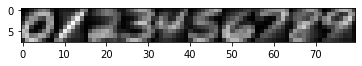

In [ ]:
'''
Question 3.0 Skeleton Code

Here you should load the data and plot
the means for each of the digit classes.
'''

import numpy as np
# Import pyplot - plt.imshow is useful!
import matplotlib.pyplot as plt

def plot_means(train_data, train_labels):
  # TODO
    means = []
    for i in range(0, 10):
        i_digits = get_digits_by_label(train_data, train_labels, i)
        # Compute mean of class i
        mean_vec_size = len(i_digits[0])
        means.append([])
        for j in range(mean_vec_size):
            means[i].append(np.mean(i_digits[:, j])) 
        means[i] = np.array(means[i]).reshape(int(np.sqrt(mean_vec_size)),int(np.sqrt(mean_vec_size))) #8x8

    # Plot all means on same axis
    all_concat = np.concatenate(means, 1)
    plt.imshow(all_concat, cmap='gray')
    plt.show()

if __name__ == '__main__':
    train_data, train_labels, test_data, test_labels = load_all_data_from_zip('a3digits.zip', '/content/hw3_data/')
    plot_means(train_data, train_labels)

In [ ]:
'''
Question 3.1 Skeleton Code

Here you should implement and evaluate the k-NN classifier.
'''

import numpy as np
# Import pyplot - plt.imshow is useful!
import matplotlib.pyplot as plt


class KNearestNeighbor(object):
    '''
    K Nearest Neighbor classifier
    '''

    def __init__(self, train_data, train_labels):
        self.train_data = train_data
        self.train_norm = (self.train_data**2).sum(axis=1).reshape(-1,1)
        self.train_labels = train_labels

    def l2_distance(self, test_point):
        '''
        Compute L2 distance between test point and each training point
        
        Input: test_point is a 1d numpy array
        Output: dist is a numpy array containing the distances between the test point and each training point
        '''
        # Process test point shape
        test_point = np.squeeze(test_point)
        if test_point.ndim == 1:
            test_point = test_point.reshape(1, -1)
        assert test_point.shape[1] == self.train_data.shape[1]

        # Compute squared distance
        test_norm = (test_point**2).sum(axis=1).reshape(1,-1)
        dist = self.train_norm + test_norm - 2*self.train_data.dot(test_point.transpose())
        return np.squeeze(dist)

    def query_knn(self, test_point, k):
        '''
        Query a single test point using the k-NN algorithm

        You should return the digit label provided by the algorithm
        '''
        digit = None

        # distances between the test point and each training point
        l2_dist = self.l2_distance(test_point)

        notie=False
        while notie==False:
          
          indices = np.argsort(l2_dist)[:k]
          freq = np.bincount(self.train_labels[indices].astype(np.int64))
          digit = np.argwhere(freq == np.max(freq))

# Strategy 1
# Q3.1 2 - tie breaking method (recall the function with k=k-1)
#          if len(digit)>1:
#            k=k-1
#          else:
#            notie=True

# Strategy 2
# Q3.1 2 - tie breaking method -- choose the labels (digits) with the lowest mean distance (lowest sum of distance) 
          sum_distance = []
          if digit.shape[0] > 1:
          
            for j in range (len(digit)): #e.g., 2 ties, 0-2
              j_sum=0
              for i in range (len(indices)):# k=15, 15
                if self.train_labels[indices [i]].astype(np.int64) == digit[j]:
                  j_sum+=l2_dist[indices [i]]               
              sum_distance.append(j_sum)
            return digit[np.argmin(sum_distance,axis=0)]
          else:
            return digit   

def cross_validation(train_data, train_labels, k_range=np.arange(1,2)):
    '''
    Perform 10-fold cross validation to find the best value for k

    Note: Previously this function took knn as an argument instead of train_data,train_labels.
    The intention was for students to take the training data from the knn object - this should be clearer
    from the new function signature.
    '''
    from sklearn.model_selection import KFold
    import pandas as pd
    # documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
        
    Fold = 10
    kf = KFold(n_splits=Fold, random_state=123, shuffle=True) # 10 fold
    kf.get_n_splits(train_data)
    mean_cv_accuracy = np.zeros ((k_range.max(), 2))
    
    # Loop over folds
    for train_index, test_index in kf.split(train_data):
#      print("TRAIN:", train_index, "TEST:", test_index)
      knn = KNearestNeighbor (train_data[train_index], train_labels[train_index])          
      for k in k_range:
          # Evaluate k-NN
          # average train accuracy across 10 folds
          acc,_= classification_accuracy(knn, k, train_data[train_index], train_labels[train_index])
          mean_cv_accuracy [k-1, 0] = mean_cv_accuracy [k-1, 0] + acc/Fold
          # average validation accuracy across 10 folds
          acc,_= classification_accuracy(knn, k, train_data[test_index], train_labels[test_index])
          mean_cv_accuracy [k-1, 1] = mean_cv_accuracy [k-1, 1] + acc/Fold

#    print (mean_cv_accuracy [:, 1])
    cv_accuracy = pd.DataFrame(mean_cv_accuracy, columns=['train','validation'])
    cv_accuracy['train'] = 100 *cv_accuracy['train']
    cv_accuracy['validation'] = 100 *cv_accuracy['validation']
    cv_accuracy['K'] = k_range
    # optimal K value based on val acc
    K_optimal = cv_accuracy['K'][cv_accuracy.iloc[1:]. idxmax()['validation']]
    print(cv_accuracy)

    return cv_accuracy, K_optimal
    

def classification_accuracy(knn, k, eval_data, eval_labels):
    '''
    Evaluate the classification accuracy of knn on the given 'eval_data'
    using the labels
    '''
    count = 0
    preds = []
    for i in range(len(eval_data)):
      pred = knn.query_knn(eval_data[i], k)
      preds.append(np.ndarray.flatten(np.ndarray.flatten(np.ndarray.flatten(pred))))
      if pred == eval_labels[i]:
        count +=1
    
    acc = count / len(eval_labels)
    return acc, preds



In [ ]:
train_data, train_labels, test_data, test_labels = load_all_data('/content/hw3_data')
knn = KNearestNeighbor(train_data, train_labels)

    # Q3.1 1a
train_acc_k1, _ =classification_accuracy(knn, 1, train_data, train_labels)
print("train_accuracy_k1: ", train_acc_k1*100, "%")
test_acc_k1, _ =classification_accuracy(knn, 1, test_data, test_labels)
print("test_accuracy_k1: ", test_acc_k1*100, "%")

    # Q3.1 1b
train_acc_k15, _ =classification_accuracy(knn, 15, train_data, train_labels)
print("train_accuracy_k15: ", train_acc_k15*100, "%")
test_acc_k15, _ =classification_accuracy(knn, 15, test_data, test_labels)
print("test_accuracy_k15: ", test_acc_k15*100, "%")

train_accuracy_k1:  100.0 %
test_accuracy_k1:  96.875 %
train_accuracy_k15:  96.37142857142858 %
test_accuracy_k15:  96.075 %


In [ ]:
    # Q3.1 3 
cv_accuracy, K_optimal = cross_validation(train_data, train_labels, k_range=np.arange(1,16))
optimized_test_accuracy,y_pred_knn_k1 = classification_accuracy(knn, 1, test_data, test_labels)
y_pred_knn_k1=np.ndarray.flatten(np.array(y_pred_knn_k1))
print("Test accuracy using K=1: ", optimized_test_accuracy*100, "%")
optimized_test_accuracy,y_pred_knn_bestk = classification_accuracy(knn, K_optimal, test_data, test_labels)
y_pred_knn_bestk=np.ndarray.flatten(np.ndarray.flatten(np.array(y_pred_knn_bestk)))
print("Optimized test accuracy using K=",K_optimal,": ", optimized_test_accuracy*100, "%")

Test accuracy using K=1:  96.875 %
Optimized test accuracy using K= 4 :  97.2 %


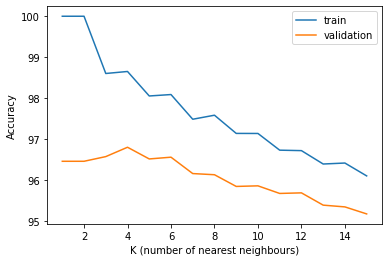

In [ ]:
plt.plot(cv_accuracy['K'], cv_accuracy['train'], label='train')
plt.plot(cv_accuracy['K'], cv_accuracy['validation'], label='validation')
plt.xlabel("K (number of nearest neighbours)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Model Comparison

*MLP*

Epoch 1/15
175/175 [==============================] - 2s 8ms/step - loss: 0.5023 - accuracy: 0.8625 - val_loss: 0.1715 - val_accuracy: 0.9514
Epoch 2/15
175/175 [==============================] - 1s 7ms/step - loss: 0.1757 - accuracy: 0.9432 - val_loss: 0.1557 - val_accuracy: 0.9529
Epoch 3/15
175/175 [==============================] - 1s 7ms/step - loss: 0.1179 - accuracy: 0.9654 - val_loss: 0.1223 - val_accuracy: 0.9600
Epoch 4/15
175/175 [==============================] - 1s 7ms/step - loss: 0.0837 - accuracy: 0.9737 - val_loss: 0.1355 - val_accuracy: 0.9600
Epoch 5/15
175/175 [==============================] - 2s 9ms/step - loss: 0.0671 - accuracy: 0.9791 - val_loss: 0.0998 - val_accuracy: 0.9650
Epoch 6/15
175/175 [==============================] - 1s 6ms/step - loss: 0.0472 - accuracy: 0.9859 - val_loss: 0.0977 - val_accuracy: 0.9686
Epoch 7/15
175/175 [==============================] - 1s 5ms/step - loss: 0.0342 - accuracy: 0.9900 - val_loss: 0.0845 - val_accuracy: 0.9721
Epoch 

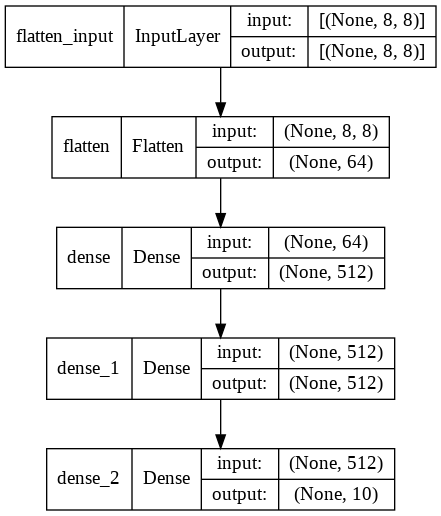

In [ ]:
# MLP
from keras.models import Sequential
from keras.layers import Flatten,Dense
from keras.utils.np_utils import to_categorical   
from keras.utils.vis_utils import plot_model

train_labels_ohe = to_categorical(train_labels, num_classes=10)

model=Sequential()
input_layer= Flatten(input_shape=(8,8))
model.add(input_layer)
hidden_layer1=Dense(512,activation='relu')
model.add(hidden_layer1)
hidden_layer2=Dense(512,activation='relu')
model.add(hidden_layer2)
output_layer=Dense(10,activation='softmax')
model.add(output_layer)

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(train_data.reshape(-1,8,8),train_labels_ohe,epochs=15, validation_split=.2)

plot_model(model, to_file='mlp.png', show_shapes=True, show_layer_names=True)

In [ ]:
y_pred_mlp = model.predict(test_data.reshape(-1, 8,8))

y_pred_mlp_argmax = []
for i in range(y_pred_mlp.shape[0]):
  y_pred_mlp_argmax.append(int(np.argmax([y_pred_mlp[i]])))

*SVM*

In [ ]:
# SVM Classifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [0.01, 0.001,0.0001],
                     'C': [1, 10, 100],
                  'kernel': ['rbf','poly','linear', 'sigmoid']}]
# specify model
model = SVC()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs = -1)      

# fit the model
model_cv.fit(train_data, train_labels) 
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_
print('best_hyperparms', best_hyperparams)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
best_hyperparams {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [ ]:
from sklearn.multiclass import OneVsRestClassifier
# SVM Classifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics

# best model
model = OneVsRestClassifier(
    SVC(C=100, gamma=.01, kernel='rbf', random_state=1,probability=True)
)

model.fit(train_data, train_labels)

y_pred_svm = model.decision_function(test_data)

y_pred_svm_argmax = []
for i in range(y_pred_svm.shape[0]):
  y_pred_svm_argmax.append(int(np.argmax([y_pred_svm[i]])))

*AdaBoost*

In [ ]:
# AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

ada = AdaBoostClassifier()

# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)
hyper_params = [ {'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                     'n_estimators':list(range(2, 102, 2))}]

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = ada, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs = -1)   

model_cv.fit(train_data, train_labels)

best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_
print('best_hyperparams', best_hyperparams)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
# taking the best parameters from the previous step
model = AdaBoostClassifier(n_estimators=90, 
                           learning_rate=0.3, random_state=1)

model.fit(train_data, train_labels)

y_pred_ada= model.predict_proba(test_data)

y_pred_ada_argmax = []
for i in range(y_pred_ada.shape[0]):
  y_pred_ada_argmax.append(int(np.argmax([y_pred_ada[i]])))

*Model Comparison*

In [ ]:
from sklearn.preprocessing import label_binarize
import sklearn
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

classes = [0,1,2,3,4,5,6,7,8,9]
n_classes = len(classes)

y_test = label_binarize(test_labels, classes=classes)
y_pred_mlp = label_binarize(y_pred_mlp_argmax, classes=classes)
y_pred_svm = label_binarize(y_pred_svm_argmax, classes=classes)
y_pred_ada = label_binarize(y_pred_ada_argmax, classes=classes)
y_pred_knn_k1 = label_binarize(y_pred_knn_k1, classes=classes)
y_pred_knn_bestk = label_binarize(y_pred_knn_bestk, classes=classes)


In [ ]:
# A lot of the code for this function was borrowed from https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
def roc(y_test, y_score):
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  # Compute micro-average ROC curve and ROC area
  fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
  roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

  plt.figure()
  lw = 2
  plt.plot(
      fpr[2],
      tpr[2],
      color="darkorange",
      lw=lw,
      label="ROC curve (area = %0.2f)" % roc_auc[2],
  )
  plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("FP Rate")
  plt.ylabel("TP Rate")
  plt.title("ROC example")
  plt.legend(loc="lower right")
  plt.show()

  # First aggregate all false positive rates
  all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

  # Then interpolate all ROC curves at this points
  mean_tpr = np.zeros_like(all_fpr)
  for i in range(n_classes):
      mean_tpr += interp(all_fpr, fpr[i], tpr[i])

  # Finally average it and compute AUC
  mean_tpr /= n_classes

  fpr["macro"] = all_fpr
  tpr["macro"] = mean_tpr
  roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

  # Plot all ROC curves
  plt.figure()
  plt.plot(
      fpr["micro"],
      tpr["micro"],
      label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
      color="deeppink",
      linestyle=":",
      linewidth=4,
  )
  plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
  )

  colors = cycle(["aqua", "darkorange", "cornflowerblue"])
  for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

  plt.plot([0, 1], [0, 1], "k--", lw=lw)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel("FP Rate")
  plt.ylabel("TP Rate")
  plt.title("ROC for multiclass")
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
def other_metrics(y_test, y_score):
  y_pred=np.argmax(y_score, axis=1)
  y_test=np.argmax(y_test, axis=1)
  # Classification report
  cr = metrics.classification_report(y_pred=y_pred, y_true=y_test)
  print(cr)
  # Confusion matrix
  cm = metrics.confusion_matrix(y_pred=y_pred, y_true=y_test)
  print("\nConfusion matrix:\n%s" % cm)
  acc = metrics.accuracy_score(y_pred, y_test)
  print("Accuracy: ", acc)
  precision = metrics.precision_score(y_test, y_pred,average ='weighted')
  print("Precision: ", precision)
  recall = metrics.recall_score(y_test, y_pred, average = 'weighted')
  print("Recall: ", recall)


In [ ]:
def performance_metrics(y_test, y_score):
  roc(y_test, y_score)
  other_metrics(y_test, y_score)


KNN, K=1


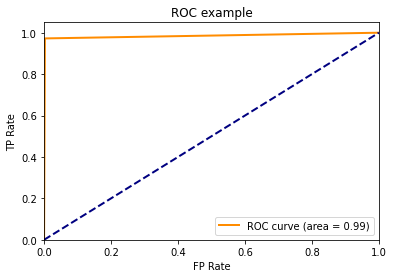

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


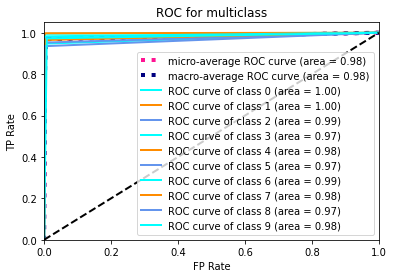

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       400
           1       0.98      1.00      0.99       400
           2       0.98      0.97      0.97       400
           3       0.95      0.95      0.95       400
           4       0.97      0.96      0.97       400
           5       0.95      0.95      0.95       400
           6       0.98      0.98      0.98       400
           7       0.97      0.97      0.97       400
           8       0.99      0.94      0.96       400
           9       0.93      0.97      0.95       400

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000


Confusion matrix:
[[398   0   0   0   0   0   1   1   0   0]
 [  0 399   1   0   0   0   0   0   0   0]
 [  4   0 389   3   1   0   0   1   1   1]
 [  0   1   4 379   0  11   1   2   1   1]
 [  0   0   0   0 386   0   2   2   0  10]
 [  1  

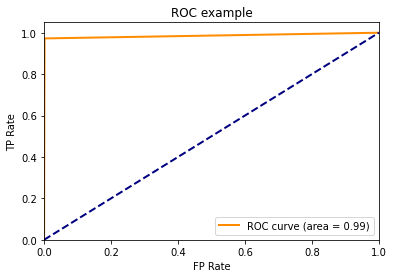

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


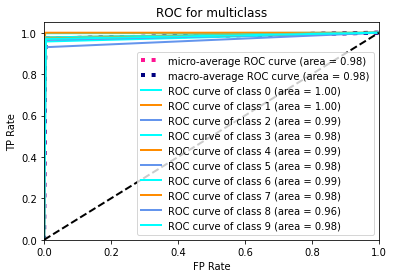

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       400
           1       0.97      1.00      0.99       400
           2       0.99      0.97      0.98       400
           3       0.98      0.96      0.97       400
           4       0.98      0.98      0.98       400
           5       0.95      0.96      0.96       400
           6       0.98      0.98      0.98       400
           7       0.96      0.97      0.97       400
           8       0.97      0.93      0.95       400
           9       0.95      0.97      0.96       400

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000


Confusion matrix:
[[399   0   0   0   0   0   0   1   0   0]
 [  0 400   0   0   0   0   0   0   0   0]
 [  4   0 389   0   1   1   1   2   1   1]
 [  0   1   2 383   0   7   1   2   3   1]
 [  0   1   0   0 391   0   1   1   0   6]
 [  1  

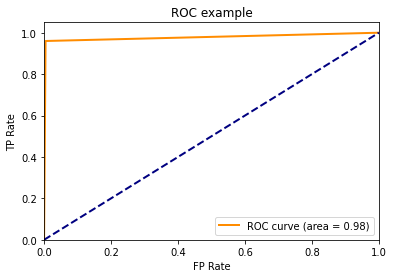

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


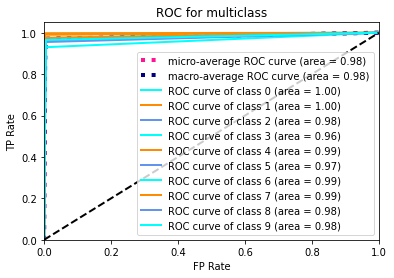

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       400
           1       0.99      1.00      0.99       400
           2       0.96      0.96      0.96       400
           3       0.96      0.93      0.95       400
           4       0.97      0.99      0.98       400
           5       0.95      0.95      0.95       400
           6       0.98      0.97      0.98       400
           7       0.98      0.97      0.98       400
           8       0.96      0.96      0.96       400
           9       0.95      0.96      0.96       400

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000


Confusion matrix:
[[398   0   0   0   1   0   1   0   0   0]
 [  0 399   0   0   1   0   0   0   0   0]
 [  0   0 384   3   0   2   5   0   5   1]
 [  0   0   9 372   0  10   0   1   6   2]
 [  0   0   1   0 396   0   1   0   0   2]
 [  1  

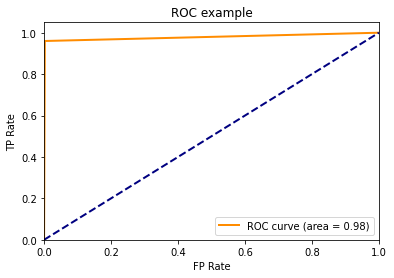

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


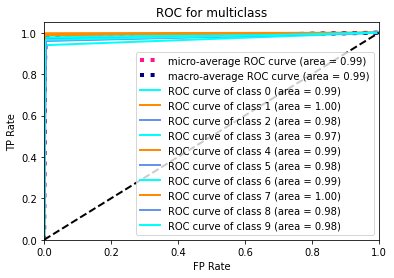

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       400
           1       1.00      1.00      1.00       400
           2       0.98      0.96      0.97       400
           3       0.96      0.94      0.95       400
           4       0.98      0.99      0.99       400
           5       0.95      0.97      0.96       400
           6       0.98      0.98      0.98       400
           7       0.98      0.99      0.99       400
           8       0.96      0.96      0.96       400
           9       0.97      0.96      0.97       400

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000


Confusion matrix:
[[396   0   0   0   2   0   1   0   1   0]
 [  0 399   0   0   0   0   0   0   1   0]
 [  1   0 384   4   0   2   5   1   2   1]
 [  0   0   5 376   0  10   0   1   6   2]
 [  0   0   0   0 395   0   1   0   0   4]
 [  2  

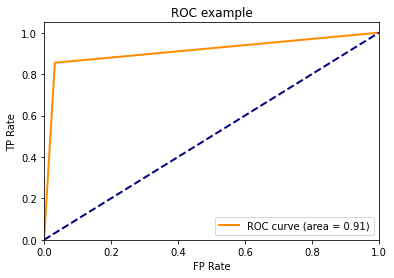

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


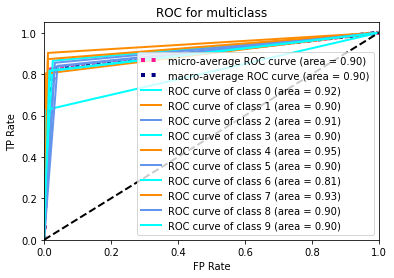

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       400
           1       0.96      0.80      0.88       400
           2       0.75      0.85      0.80       400
           3       0.84      0.81      0.83       400
           4       0.90      0.90      0.90       400
           5       0.75      0.83      0.79       400
           6       0.92      0.63      0.75       400
           7       0.89      0.87      0.88       400
           8       0.70      0.84      0.76       400
           9       0.85      0.82      0.83       400

    accuracy                           0.82      4000
   macro avg       0.83      0.82      0.82      4000
weighted avg       0.83      0.82      0.82      4000


Confusion matrix:
[[346   0   9   2   0  22   3   0  18   0]
 [  0 321   3   8  12   6   0   0  50   0]
 [  5   1 342  10   4  10  11   0  16   1]
 [  2   0  40 326   0  20   0   0   9   3]
 [  0   2   3   0 361   1   7   2   8  16]
 [  5  

In [ ]:
# KNN, K=1
print("KNN, K=1")
performance_metrics(y_test, y_pred_knn_k1)

# KNN, K=3
print("KNN, K=4")
performance_metrics(y_test, y_pred_knn_bestk)

# SVM
print("SVM: ")
performance_metrics(y_test, y_pred_svm)

# MLP
print("MLP: ")
performance_metrics(y_test, y_pred_mlp)

# ADA
print("ADA: ")
performance_metrics(y_test, y_pred_ada)